In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



In [2]:
#Create Database connection
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
results = session.query(Measurement.date, Measurement.tobs).all()
print(results)

[('2010-01-01', 65.0), ('2010-01-02', 63.0), ('2010-01-03', 74.0), ('2010-01-04', 76.0), ('2010-01-06', 73.0), ('2010-01-07', 70.0), ('2010-01-08', 64.0), ('2010-01-09', 68.0), ('2010-01-10', 73.0), ('2010-01-11', 64.0), ('2010-01-12', 61.0), ('2010-01-14', 66.0), ('2010-01-15', 65.0), ('2010-01-16', 68.0), ('2010-01-17', 64.0), ('2010-01-18', 72.0), ('2010-01-19', 66.0), ('2010-01-20', 66.0), ('2010-01-21', 69.0), ('2010-01-22', 67.0), ('2010-01-23', 67.0), ('2010-01-24', 71.0), ('2010-01-25', 67.0), ('2010-01-26', 76.0), ('2010-01-27', 68.0), ('2010-01-28', 72.0), ('2010-01-30', 70.0), ('2010-01-31', 67.0), ('2010-02-01', 66.0), ('2010-02-03', 67.0), ('2010-02-04', 69.0), ('2010-02-05', 67.0), ('2010-02-06', 67.0), ('2010-02-07', 64.0), ('2010-02-08', 69.0), ('2010-02-09', 73.0), ('2010-02-11', 73.0), ('2010-02-12', 69.0), ('2010-02-13', 69.0), ('2010-02-14', 69.0), ('2010-02-15', 71.0), ('2010-02-16', 61.0), ('2010-02-17', 69.0), ('2010-02-19', 63.0), ('2010-02-20', 64.0), ('2010-02

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

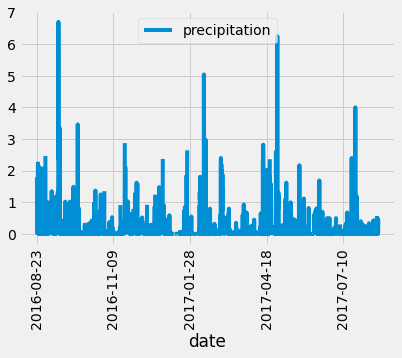

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='precipitation',rot=90, figsize=(6,4))


In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [43]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [53]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

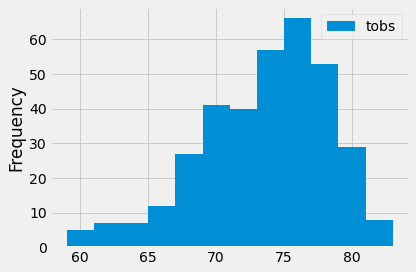

In [59]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
#print(df.to_string(index=False))

df.plot.hist(bins=12)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date,end_date)

# Challenge